In [ ]:

pip install tensorflow


Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.6421 - loss: 1.7548 - val_accuracy: 0.5950 - val_loss: 0.6628
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.7016 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 1.1037
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7802 - loss: 0.4796 - val_accuracy: 0.7917 - val_loss: 0.4643
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8211 - loss: 0.4286 - val_accuracy: 0.5017 - val_loss: 1.2411
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8075 - loss: 0.3981 - val_accuracy: 0.8533 - val_loss: 0.3959
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8547 - loss: 0.3161 - val_accuracy: 0.8067 - val_loss: 0.4373
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8640 - loss: 0.2688 - val_accuracy: 0.8267 - val_loss: 0.3584
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9097 - loss: 0.2137 - val_accuracy: 0.8850 - v

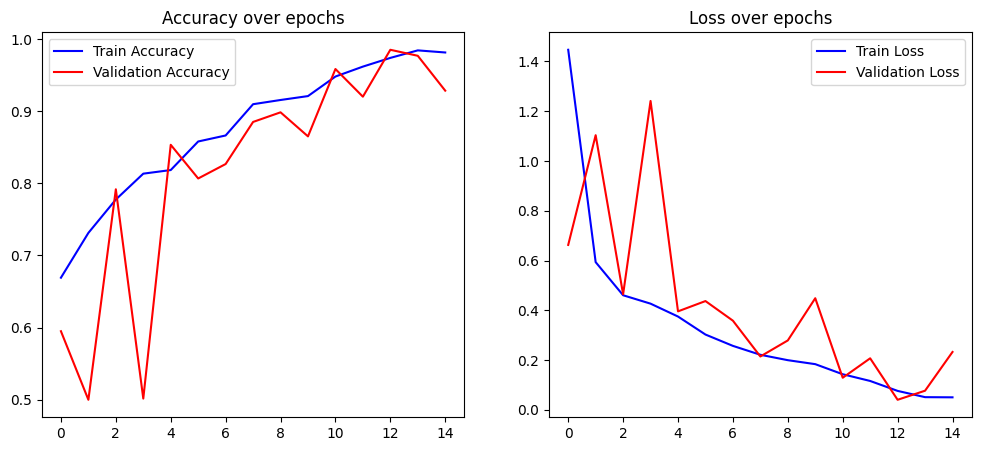

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step
y_true shape: (600,) Unique values: [0 1]
y_pred_prob shape: (600, 1) Sample values: [[3.5046297e-09]
 [7.1941018e-25]
 [2.8255302e-03]
 [1.6980050e-02]
 [3.4645127e-06]]


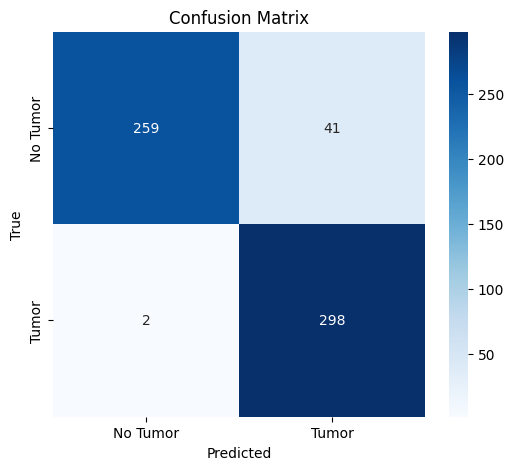

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       300
           1       0.88      0.99      0.93       300

    accuracy                           0.93       600
   macro avg       0.94      0.93      0.93       600
weighted avg       0.94      0.93      0.93       600



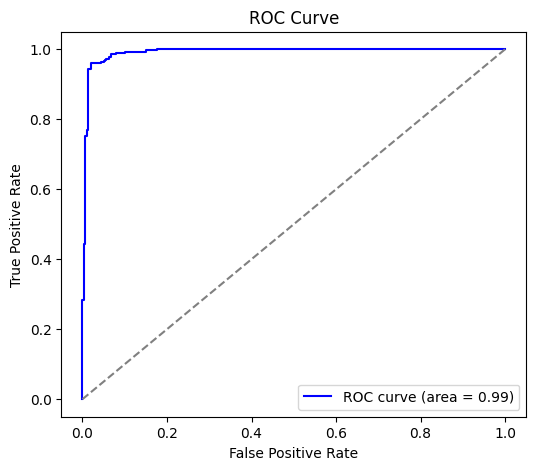

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns

# Define image size and batch size
img_size = (128, 128)
batch_size = 32

# Define dataset directory
dataset_path = "/content/drive/MyDrive/DAUP/brain_tumor_dataset"

# Create ImageDataGenerator for data augmentation and rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Ensure the order is maintained for correct predictions
)

# Build Improved CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

# Plot learning curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss over epochs')
plt.legend()

plt.show()

# Get predictions and true labels
val_generator.reset()  # Reset to ensure order consistency
y_true = val_generator.classes  # Get true labels
y_pred_prob = model.predict(val_generator)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary labels

# Debugging: Print shapes and unique values
print("y_true shape:", y_true.shape, "Unique values:", np.unique(y_true))
print("y_pred_prob shape:", y_pred_prob.shape, "Sample values:", y_pred_prob[:5])

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob.ravel())  # Flatten probabilities
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
model.save('my_model.h5')

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('my_model.h5') # Replace with your model path

# Preprocess the image
img_path = '/content/drive/MyDrive/DAUP/brain_tumor_dataset/yes/y1005.jpg' # Replace with your image path
img = image.load_img(img_path, target_size=(128, 128))  # Adjust target_size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Tumor detected")
else:
    print("No tumor detected")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)